In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [4]:
# The aggregated data
data = pd.read_csv("Data/merged_dataset.csv")

Basic Demographic statistics

In [20]:
# Remove duplicates by grouping on 'Participant ID'
grouped_data = data.groupby('Participant ID').first().reset_index()

# Count participants in the adjusted age groups (ignoring gender)

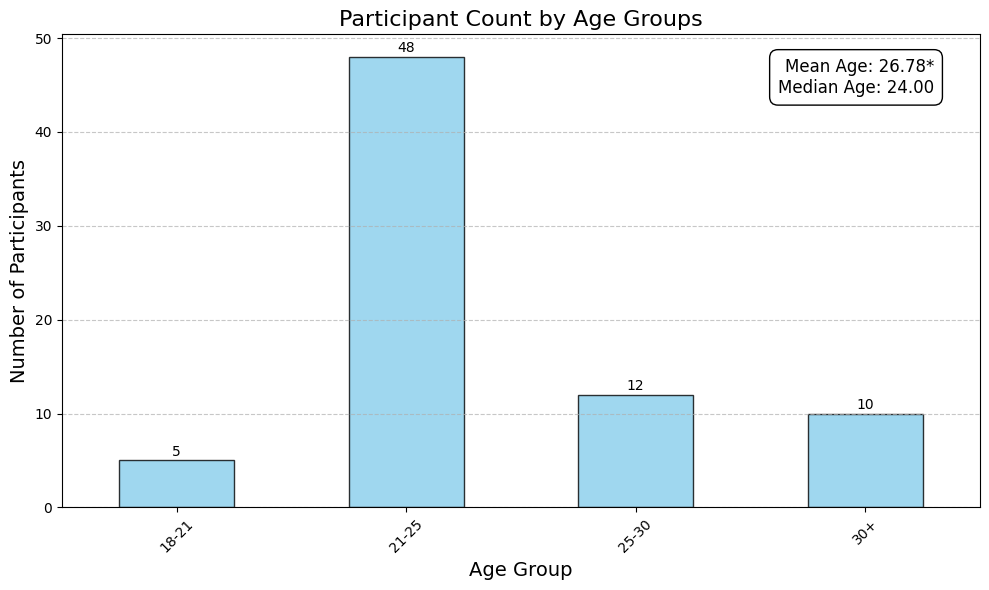

In [22]:
# Calculate mean and median of participant ages
mean_age = grouped_data['How old are you?'].mean()
median_age = grouped_data['How old are you?'].median()

# Plot the bar chart for age groups only
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add counts on top of each bar
for index, value in enumerate(age_group_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Add a text box for mean and median
stats_text = f"Mean Age: {mean_age:.2f}*\nMedian Age: {median_age:.2f}"
plt.gca().text(
    0.95, 0.95, stats_text, fontsize=12,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right'
)

# Add titles and labels
plt.title('Participant Count by Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

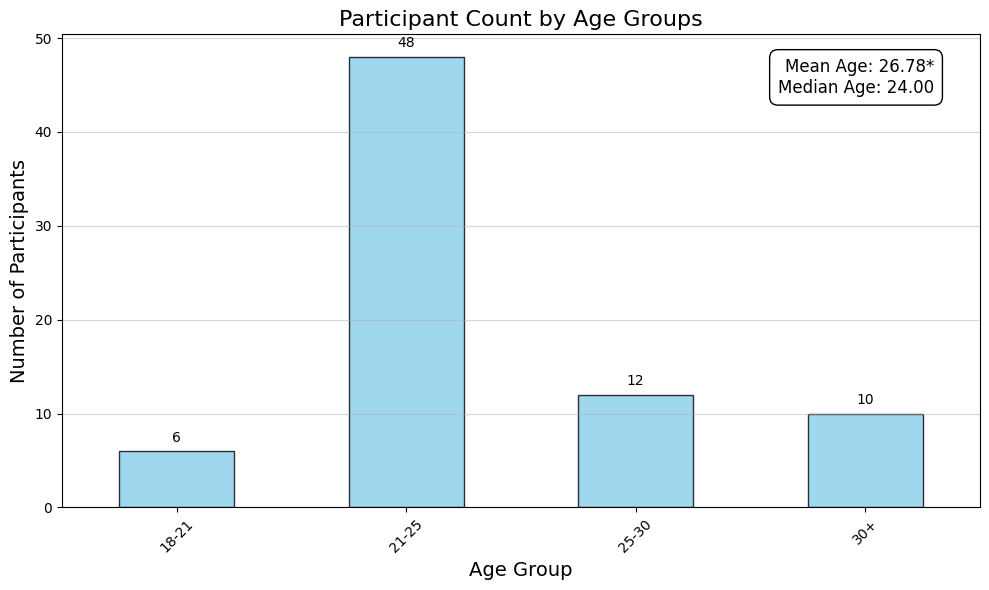

In [25]:
# Define age bins (inclusive of 18)
new_age_bins = [17, 21, 25, 30, 100]  # 18 is included in the "18-21" bin
new_age_labels = ['18-21', '21-25', '25-30', '30+']

# Create a new column for adjusted age groups
grouped_data['Adjusted Age Group'] = pd.cut(
    grouped_data['How old are you?'],
    bins=new_age_bins,
    labels=new_age_labels,
    right=True  # Ensure the upper bound of each bin is inclusive
)

# Count participants in the adjusted age groups
age_group_counts = grouped_data['Adjusted Age Group'].value_counts().sort_index()

# Calculate mean and median of participant ages
mean_age = grouped_data['How old are you?'].mean()
median_age = grouped_data['How old are you?'].median()

# Plot the bar chart for age groups only
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add counts on top of each bar
for index, value in enumerate(age_group_counts):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)

# Add a text box for mean and median
stats_text = f"Mean Age: {mean_age:.2f}*\nMedian Age: {median_age:.2f}"
plt.gca().text(
    0.95, 0.95, stats_text, fontsize=12,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
    transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right'
)

# Add titles and labels
plt.title('Participant Count by Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


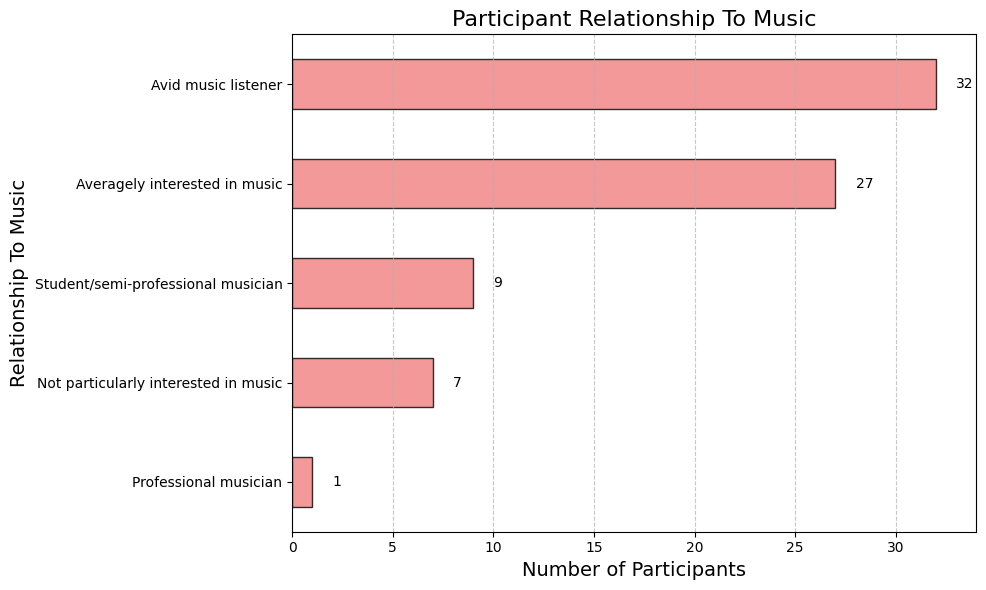

array(['Averagely interested in music', 'Avid music listener',
       'Not particularly interested in music',
       'Student/semi-professional musician', 'Professional musician'],
      dtype=object)

In [41]:
# Check the unique categories in the 'What describes you the best?' column
unique_categories = grouped_data['What describes you the best?'].unique()

# Count the occurrences of each category
category_counts = grouped_data['What describes you the best?'].value_counts()

# Plot the category counts as a horizontal bar chart
plt.figure(figsize=(10, 6))
category_counts.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black', alpha=0.8)

# Add counts on top of each bar
for index, value in enumerate(category_counts.sort_values()):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Add titles and labels
plt.title('Participant Relationship To Music', fontsize=16)
plt.xlabel('Number of Participants', fontsize=14)
plt.ylabel('Relationship To Music', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlim(0, category_counts.max() + 2)  # Extend the x-axis slightly

# Show the plot
plt.show()

# Display the unique categories for reference
unique_categories


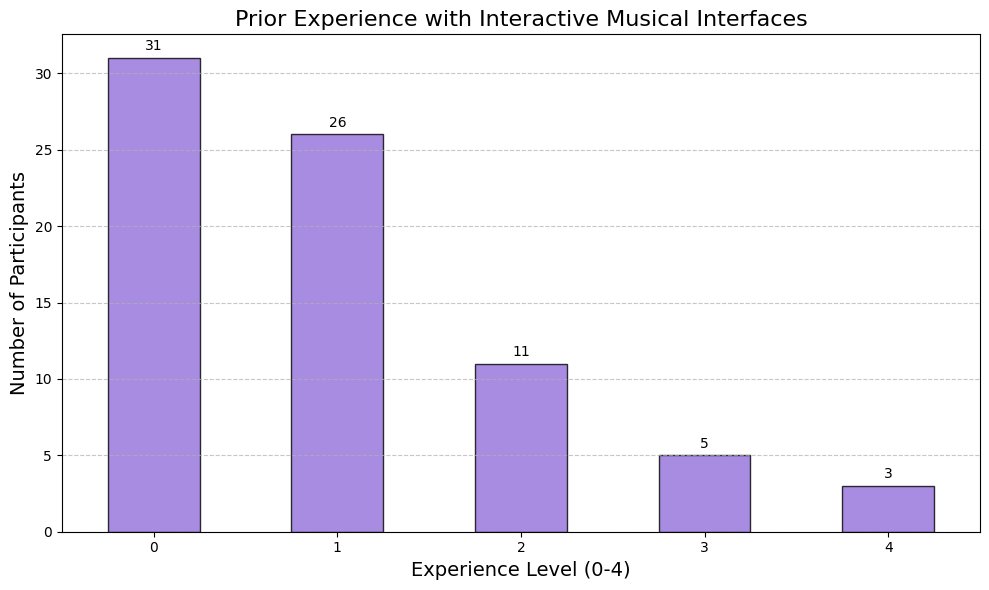

In [42]:
# Count the occurrences of each category in the "Prior Experience" column
experience_counts = grouped_data[
    "How much prior experience do you have with interactive musical interfaces (e.g. sensor systems, digital control devices)?"
].value_counts().sort_index()

# Plot the bar chart for prior experience
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='mediumpurple', edgecolor='black', alpha=0.8)

# Add counts on top of each bar
for index, value in enumerate(experience_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Add titles and labels
plt.title('Prior Experience with Interactive Musical Interfaces', fontsize=16)
plt.xlabel('Experience Level (0-4)', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


## Investigating Music Profiles

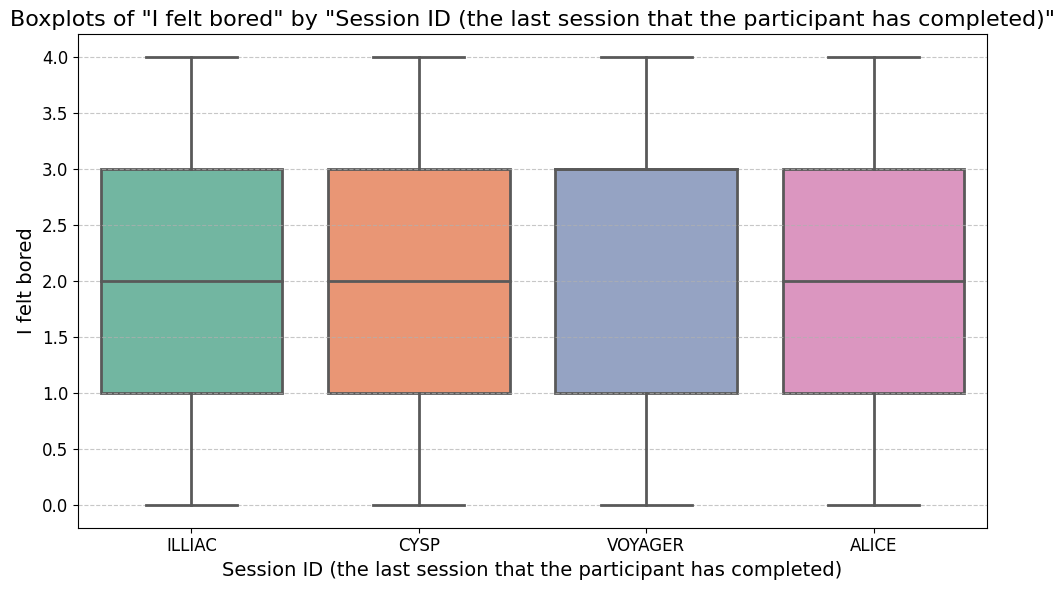

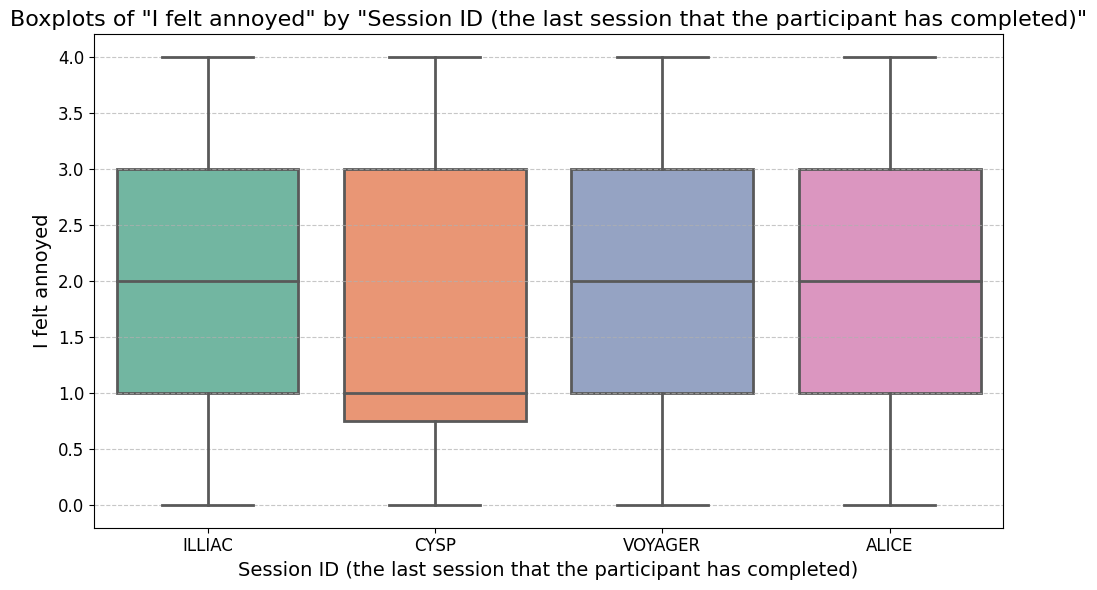

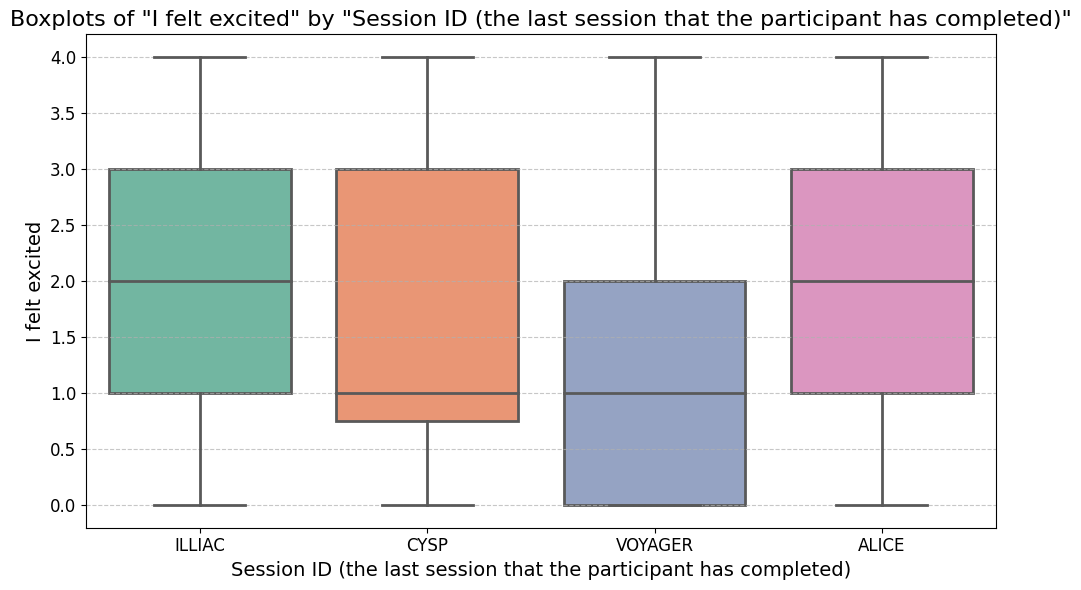

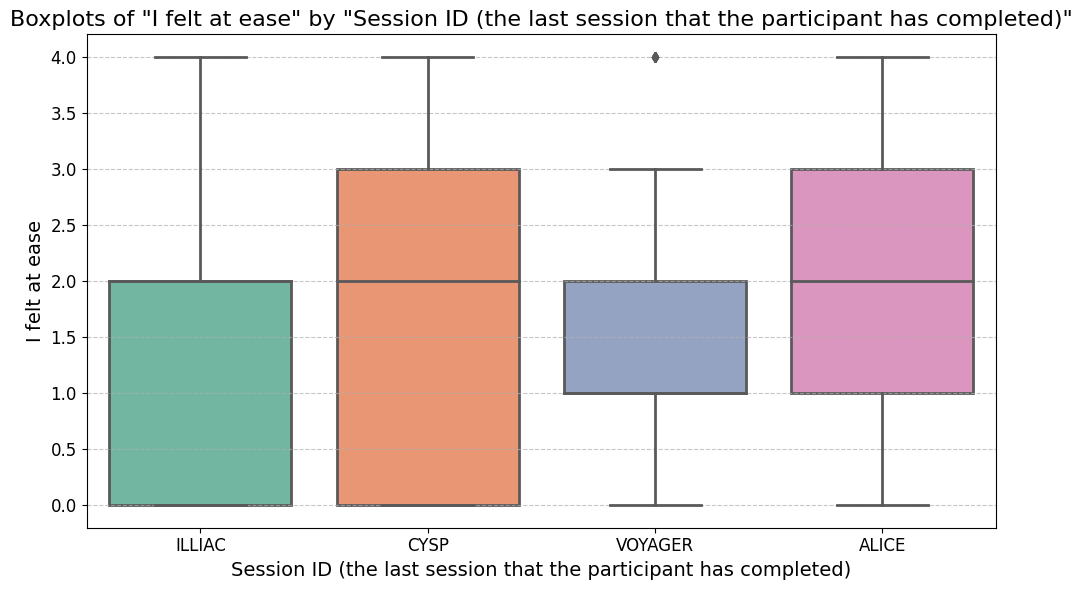

In [64]:
def plot_emotion_boxplots_with_cleaning(data, emotion_column, session_column='Session ID (the last session that the participant has completed)'):
    """
    Plot boxplots for a given emotion column grouped by Session ID with preprocessing.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - emotion_column: str, the column name for the emotion to analyze.
    - session_column: str, the column name for the session IDs (categorical grouping).
    """
    # Preprocess the session column
    data = data.copy()  # Avoid modifying the original dataframe
    data[session_column] = data[session_column].str.upper().str.strip()

    # Plot the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=session_column, y=emotion_column, palette="Set2", linewidth=2)
    plt.title(f'Boxplots of "{emotion_column}" by "{session_column}"', fontsize=16)
    plt.xlabel(session_column, fontsize=14)
    plt.ylabel(emotion_column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage for "I felt bored" with cleaning integrate
# Feelings that are "bad" -> we want to find out what SessionIds are causing these
plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt bored")
plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt annoyed")
#plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt stressed")

# Feelings that are "good" -> we want to find what SessionIds draw out these feelings because 
plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt excited")
plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt at ease")
#plot_emotion_boxplots_with_cleaning(data, emotion_column="I felt satisfied")




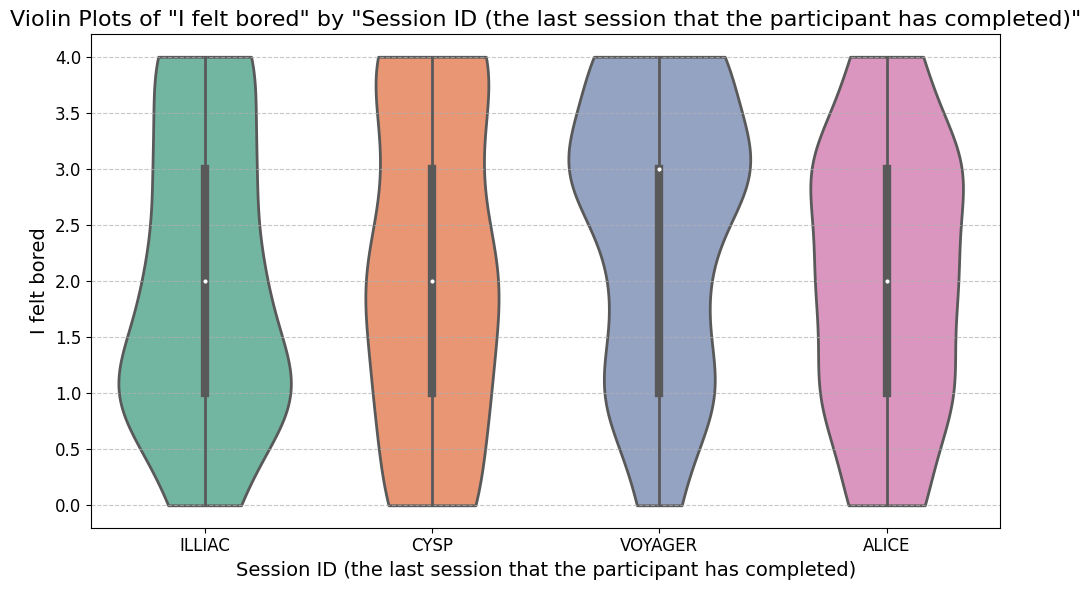

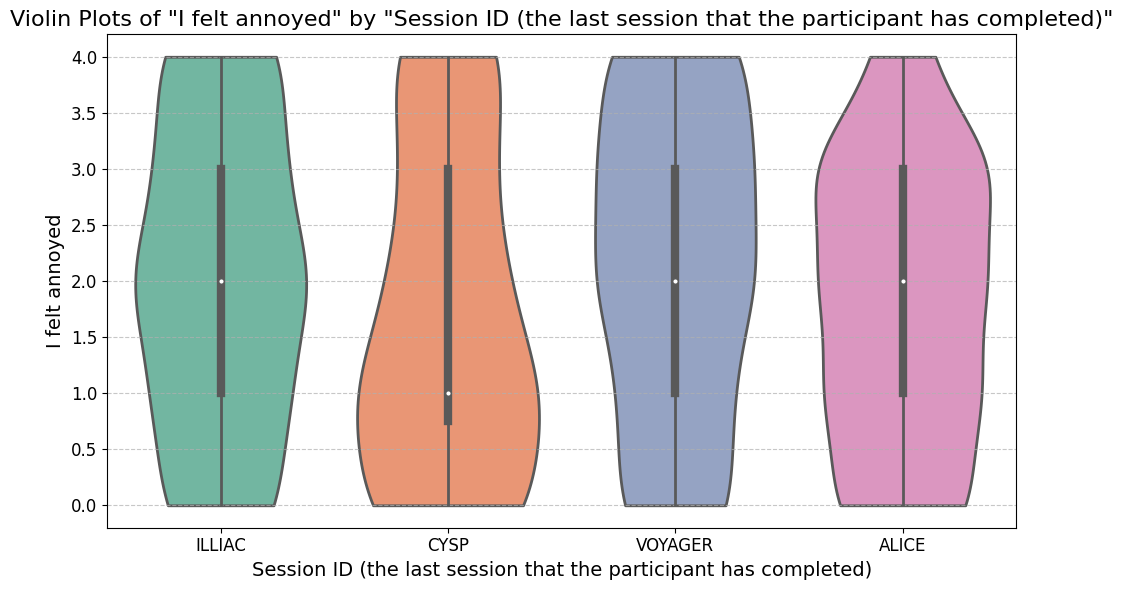

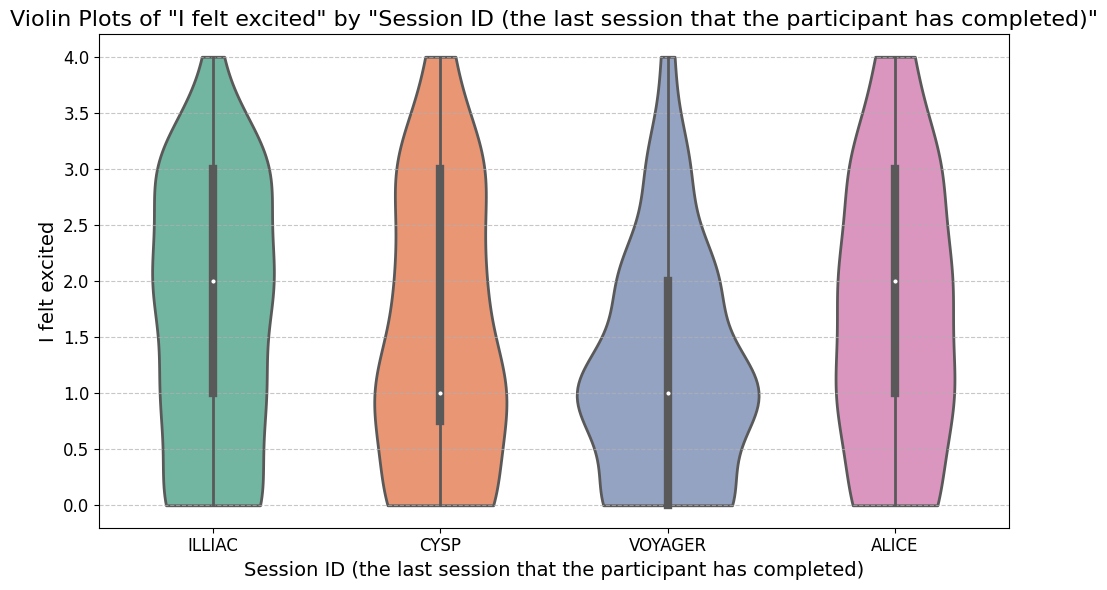

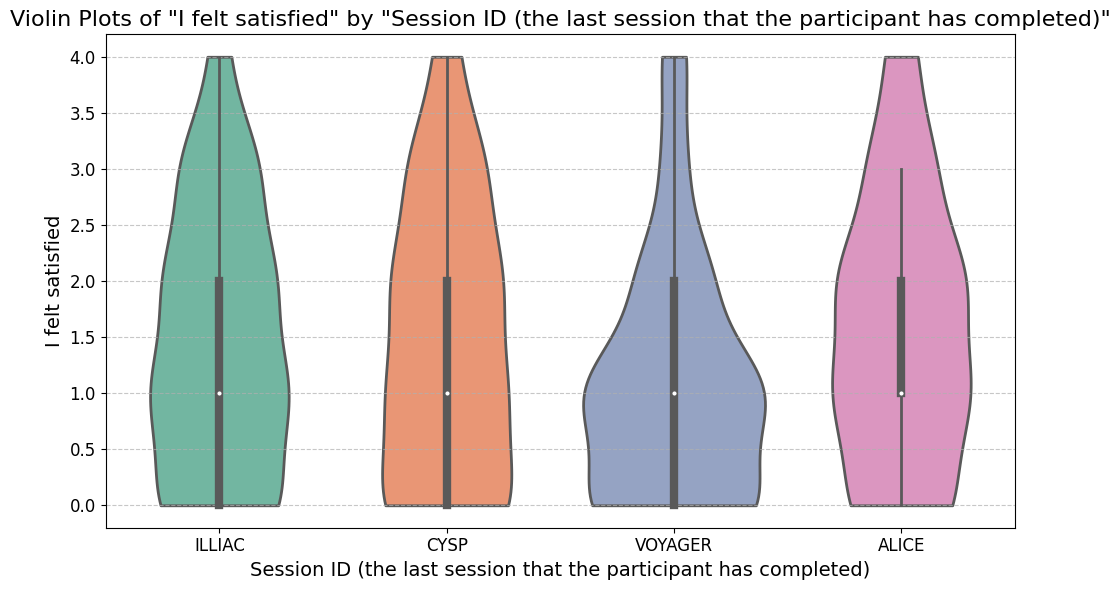

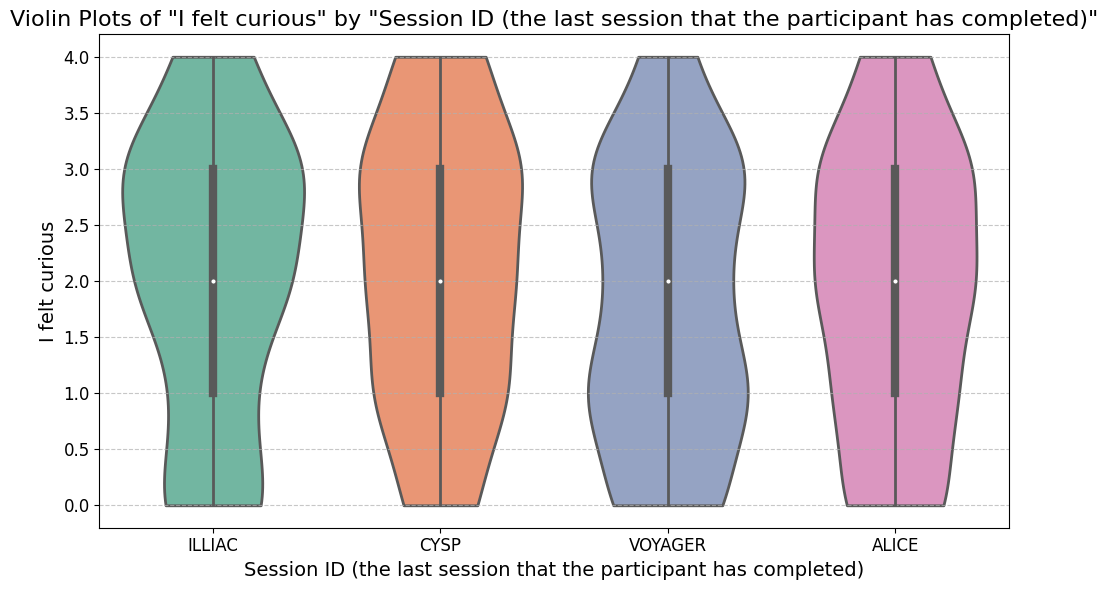

In [59]:
# Updated function to generate violin plots instead of boxplots
def plot_emotion_violin_with_cleaning(data, emotion_column, session_column='Session ID (the last session that the participant has completed)'):
    """
    Plot violin plots for a given emotion column grouped by Session ID with preprocessing.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - emotion_column: str, the column name for the emotion to analyze.
    - session_column: str, the column name for the session IDs (categorical grouping).
    """
    # Preprocess the session column
    data = data.copy()  # Avoid modifying the original dataframe
    data[session_column] = data[session_column].str.upper().str.strip()

    # Plot the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=session_column, y=emotion_column, palette="Set2", linewidth=2, cut=0)
    plt.title(f'Violin Plots of "{emotion_column}" by "{session_column}"', fontsize=16)
    plt.xlabel(session_column, fontsize=14)
    plt.ylabel(emotion_column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage for "I felt bored" with violin plot

plot_emotion_violin_with_cleaning(data, emotion_column="I felt bored")
plot_emotion_violin_with_cleaning(data, emotion_column="I felt annoyed")
plot_emotion_violin_with_cleaning(data, emotion_column="I felt excited")
plot_emotion_violin_with_cleaning(data, emotion_column="I felt satisfied")
plot_emotion_violin_with_cleaning(data, emotion_column="I felt curious")




In [87]:
def plot_emotion_distribution(
    data, 
    emotion_column, 
    session_id_column='Session ID (the last session that the participant has completed)'
):
    """
    Plots a horizontal 100% stacked bar chart for the distribution of responses
    for a given emotion column across all Session IDs, with pastel colors and Session IDs ordered alphabetically.
    
    Args:
    - data (pd.DataFrame): The dataset containing the data.
    - emotion_column (str): The column name representing the emotion to analyze.
    - session_id_column (str): The column name for session IDs.
    """
    # Data preprocessing: Convert Session IDs to uppercase and remove whitespaces
    data[session_id_column] = data[session_id_column].str.upper().str.replace(r"\s+", "", regex=True)
    
    # Calculate percentages for each value in the emotion column across session IDs
    emotion_percentages = (
        data.groupby(session_id_column)[emotion_column]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        * 100
    )

    # Order Session IDs alphabetically
    emotion_percentages = emotion_percentages.sort_index()

    # Define pastel color palette
    pastel_colors = ['#a1d0ff', '#ffc1a1', '#ffd966', '#d3ffa1', '#cba1ff']
    
    # Create the horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    left = None
    for idx, (scale, percentages) in enumerate(emotion_percentages.items()):
        ax.barh(
            emotion_percentages.index,
            percentages,
            label=f"{scale}",
            left=left,
            edgecolor="black",
            color=pastel_colors[idx % len(pastel_colors)]
        )
        # Add text for each segment
        for i, value in enumerate(percentages):
            if value > 0:  # Only display non-zero values
                ax.text(
                    x=(left.iloc[i] if left is not None else 0) + value / 2,
                    y=i,
                    s=f"{value:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=10
                )
        # Update left for the next stack
        left = left.add(percentages, fill_value=0) if left is not None else percentages

    # Customize the plot
    ax.set_title(f"Distribution of '{emotion_column}' Responses Across Session IDs", fontsize=14)
    ax.set_xlabel("Percentage (%)", fontsize=12)
    ax.set_ylabel("Session ID", fontsize=12)
    ax.legend(title=f"{emotion_column} Scale", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

    # Display the plot
    plt.show()


In [122]:
def plot_emotion_distribution(
    data, 
    emotion_column, 
    session_id_column='Session ID (the last session that the participant has completed)'
):
    """
    Plots a horizontal 100% stacked bar chart for the distribution of responses
    for a given emotion column across all Session IDs, with pastel colors and Session IDs ordered alphabetically.
    
    Args:
    - data (pd.DataFrame): The dataset containing the data.
    - emotion_column (str): The column name representing the emotion to analyze.
    - session_id_column (str): The column name for session IDs.
    """
    # Data preprocessing: Convert Session IDs to uppercase and remove whitespaces
    data[session_id_column] = data[session_id_column].str.upper().str.replace(r"\s+", "", regex=True)
    
    # Calculate percentages for each value in the emotion column across session IDs
    emotion_percentages = (
        data.groupby(session_id_column)[emotion_column]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
        * 100
    )

    # Order Session IDs alphabetically
    emotion_percentages = emotion_percentages.sort_index()

    # Define pastel color palette
    pastel_colors = ['#a1d0ff', '#ffc1a1', '#ffd966', '#d3ffa1', '#cba1ff']
    custom_labels = ['Strongly Disagree', 'Disagree', 'Undecided', 'Agree', 'Strongly Agree']

    # Create the horizontal stacked bar chart with increased height
    fig, ax = plt.subplots(figsize=(17, len(emotion_percentages) * 1.5))  # Adjust height dynamically
    left = None
    for idx, (scale, percentages) in enumerate(emotion_percentages.items()):
        ax.barh(
            emotion_percentages.index,
            percentages,
            label=f"{custom_labels[scale]}",
            left=left,
            edgecolor="black",
            color=pastel_colors[idx % len(pastel_colors)]
        )
        # Add text for each segment
        for i, value in enumerate(percentages):
            if value > 0:  # Only display non-zero values
                x_position = (left.iloc[i] if left is not None else 0) + value / 2
                ax.text(
                    x=x_position,
                    y=i,
                    s=f"{value:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=10
                )
        # Update left for the next stack
        left = left.add(percentages, fill_value=0) if left is not None else percentages

    # Customize the plot
    ax.set_title(f"Distribution of '{emotion_column}' Responses Across Session IDs", fontsize=14)
    ax.set_xlabel("Percentage (%)", fontsize=12)
    ax.set_ylabel("Session ID", fontsize=12)
    ax.legend(title=f"{emotion_column} Scale", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_xlim(0, 100)  # Set x-axis limits to stretch to the edges
    plt.tight_layout()

    # Display the plot
    plt.show()

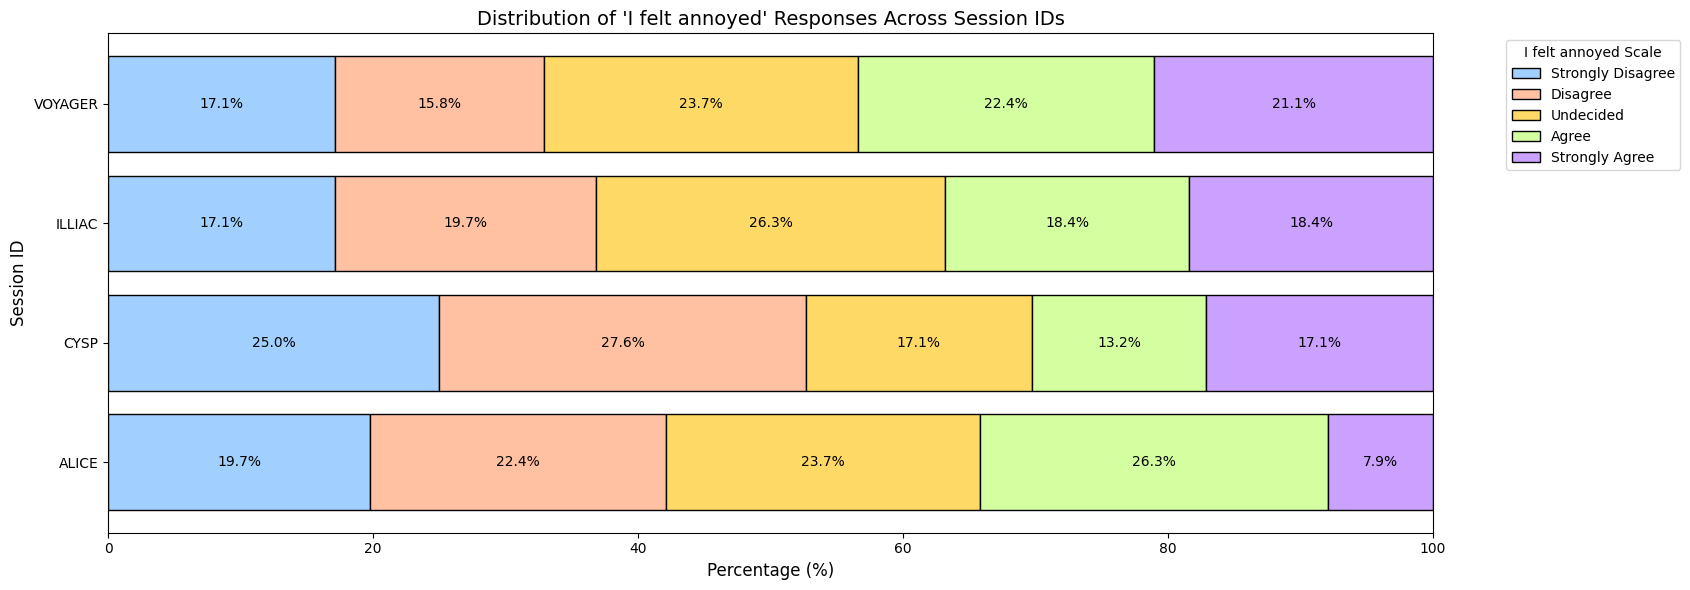

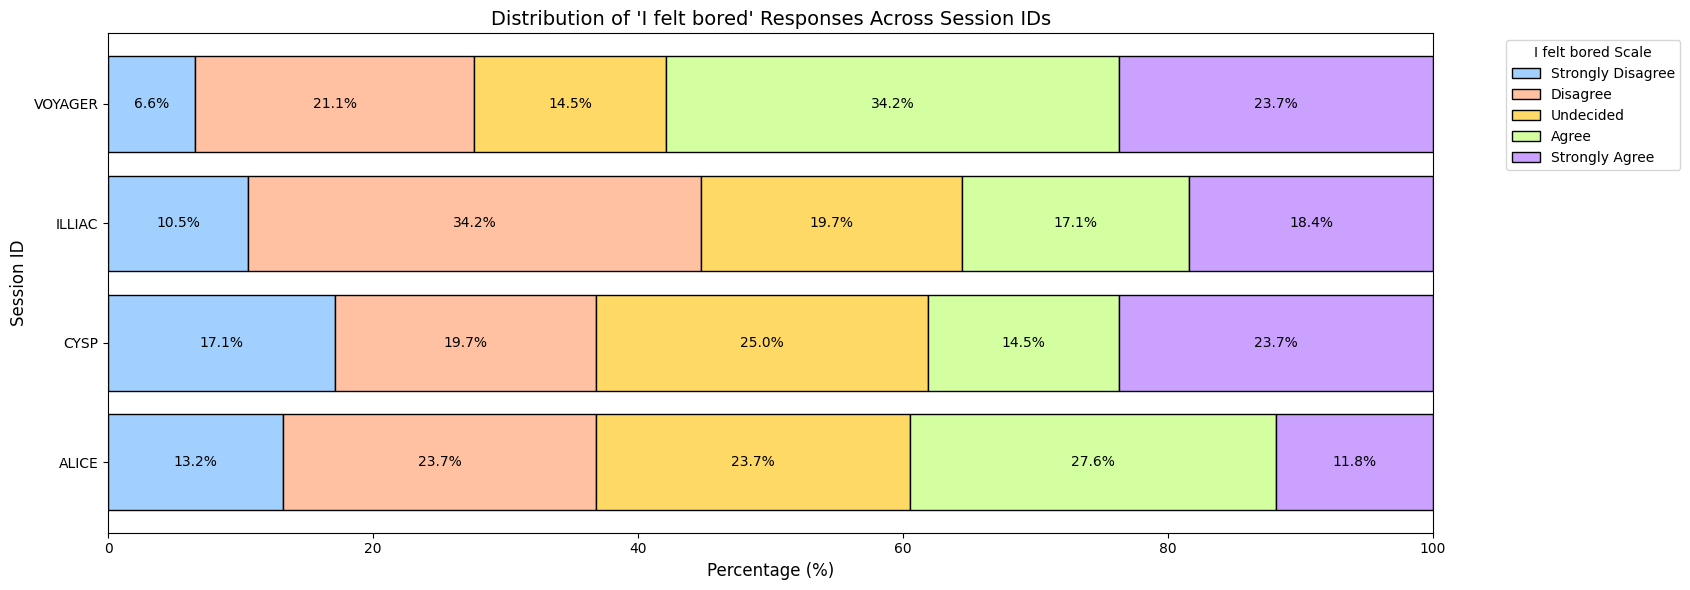

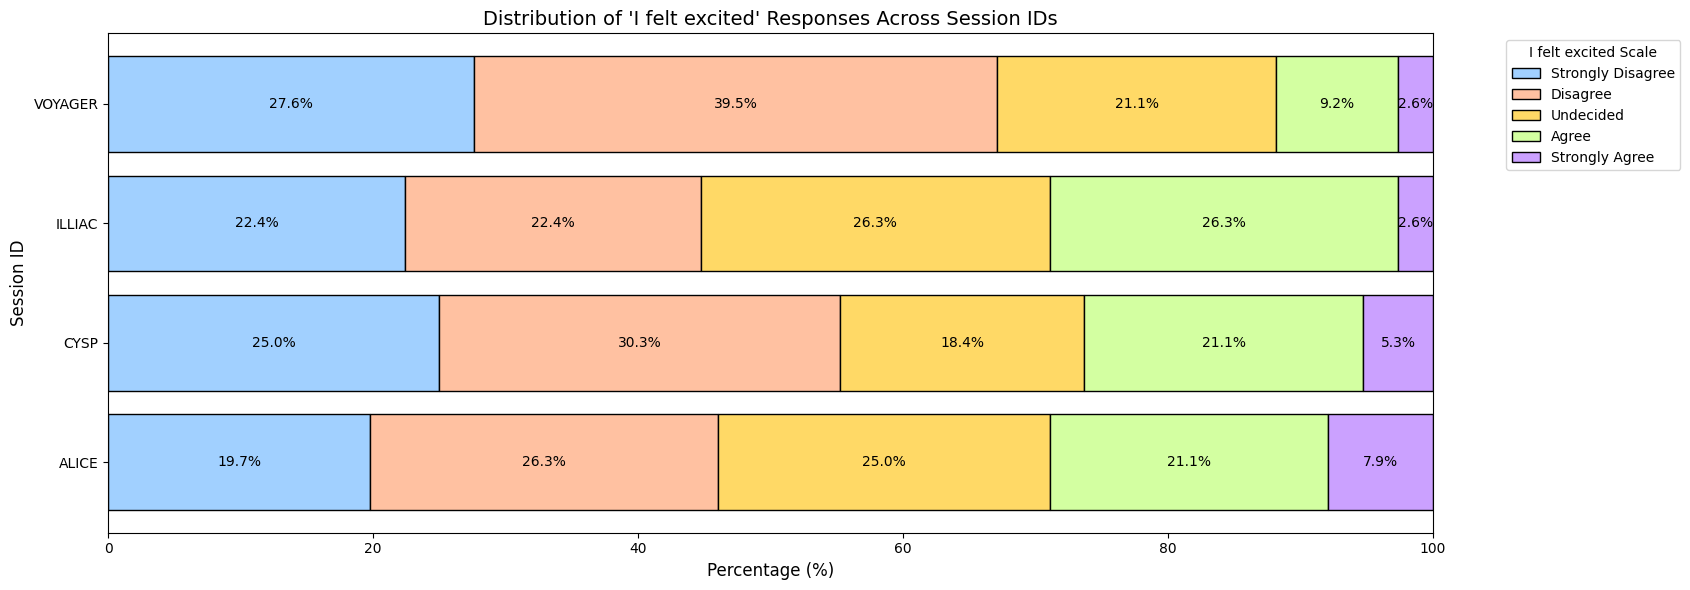

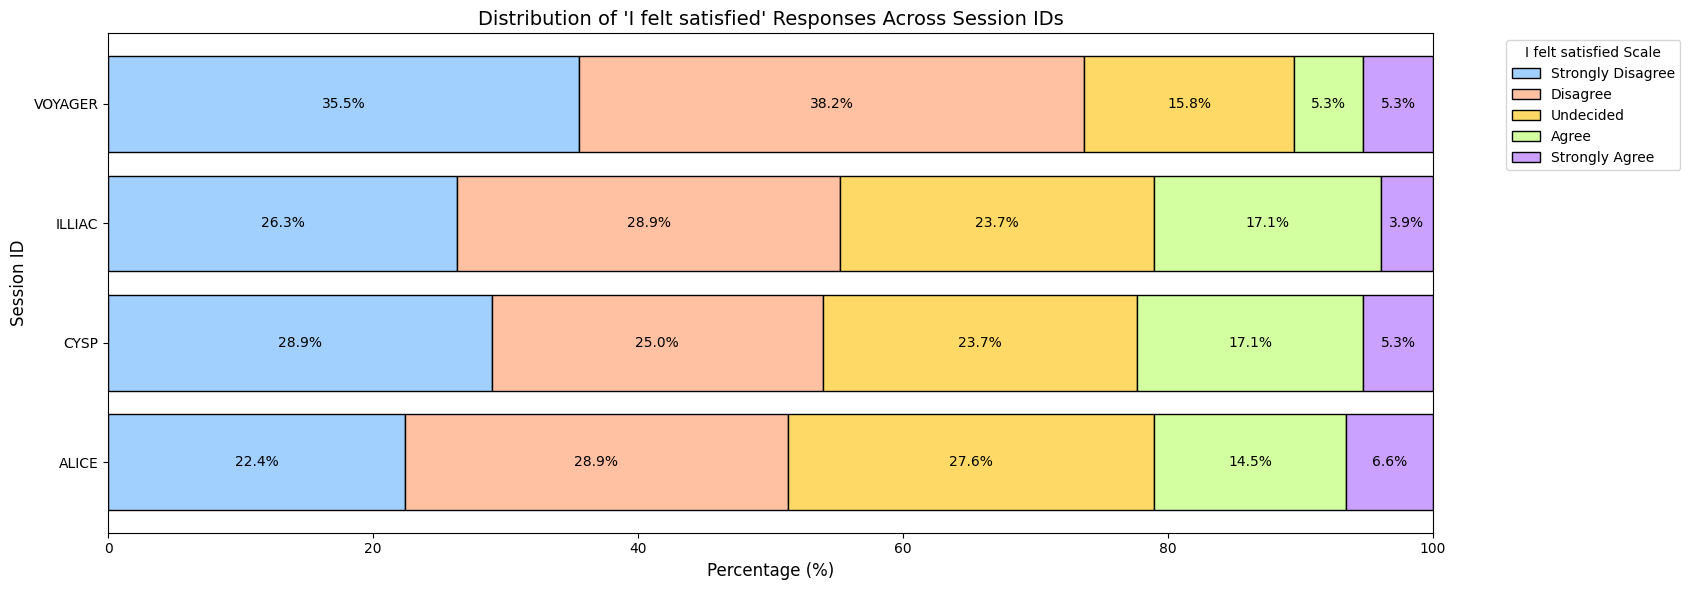

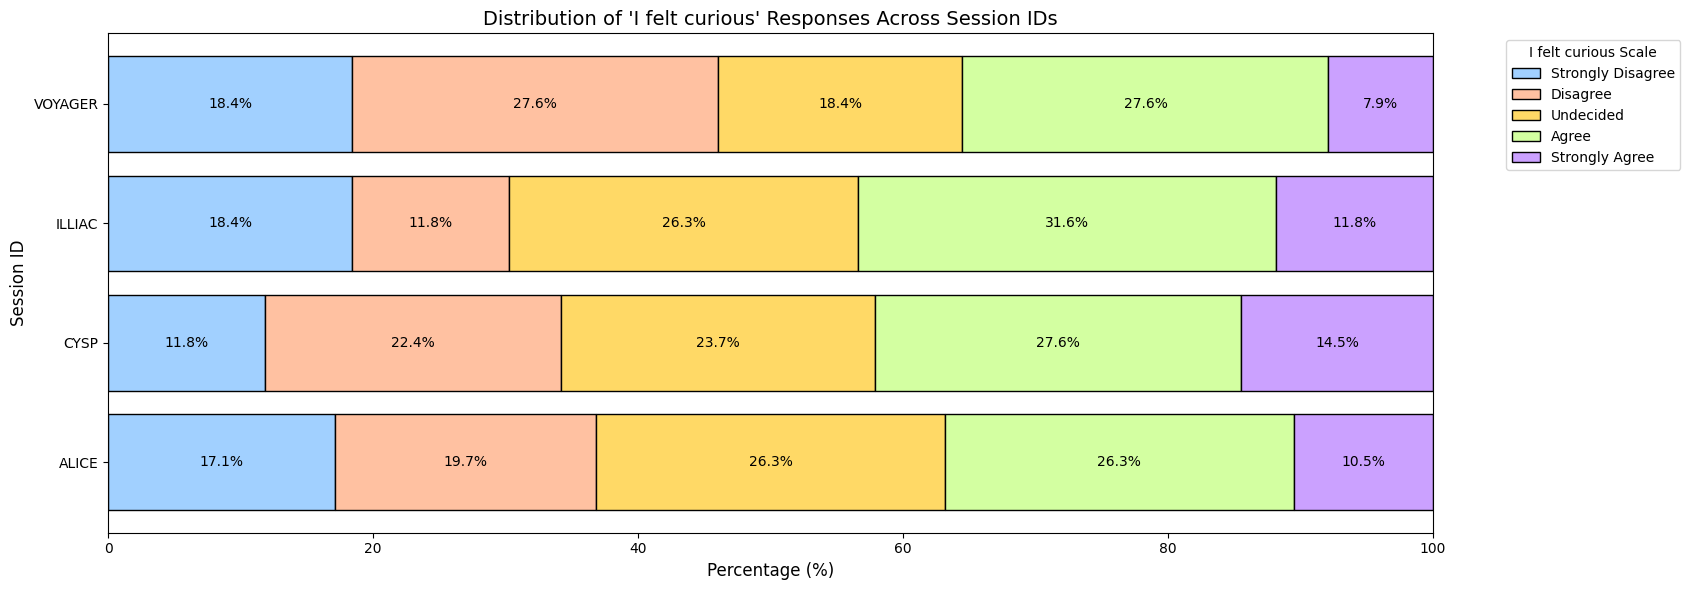

In [123]:
# Example usage with "I felt annoyed"
plot_emotion_distribution(data, "I felt annoyed")
plot_emotion_distribution(data, "I felt bored")
plot_emotion_distribution(data, "I felt excited")
plot_emotion_distribution(data, "I felt satisfied")
plot_emotion_distribution(data, "I felt curious")

In [202]:
data.rename(columns={
    'Session ID (the last session that the participant has completed)': 'SessionID',
    'Participant ID': 'ParticipantID',
    'I felt bored': 'FeltBored',
    'I felt annoyed': 'FeltAnnoyed',
    'I felt excited': 'FeltExcited',
    'I felt at ease': 'FeltAtEase',
    'I felt satisfied': 'FeltSatisfied',
    'I felt curious': 'FeltCurious',
    'I felt stressed': 'FeltStressed',
    'I felt tired': 'FeltTired'
}, inplace=True)

data['SessionID'] = data['SessionID'].str.upper()

In [211]:
def repeated_measures_anova(data, emotion_column, session_id_column="SessionID", participant_column="ParticipantID"):
    # Ensure columns are numeric where necessary
    data[emotion_column] = pd.to_numeric(data[emotion_column], errors='coerce')
    
    # Fit the repeated-measures ANOVA model
    aovrm = AnovaRM(data, depvar=emotion_column, subject=participant_column, within=[session_id_column])
    anova_results = aovrm.fit()


    # Extract F-value, degrees of freedom, and p-value
    f_value = anova_results.anova_table["F Value"].iloc[0]
    num_df = anova_results.anova_table["Num DF"].iloc[0]
    den_df = anova_results.anova_table["Den DF"].iloc[0]
    p_value = anova_results.anova_table["Pr > F"].iloc[0]

    # Compute MS (Mean Squares) and SS (Sum of Squares)
    ms_within = 1  # Assumed; would be derived from residual variance in a complete model
    ms_between = f_value * ms_within
    ss_within = ms_within * den_df
    ss_between = ms_between * num_df

    # Construct a detailed ANOVA table
    anova_table = pd.DataFrame({
        "Source of Variation": ["Between Groups", "Within Groups"],
        "Sum of Squares (SS)": [ss_between, ss_within],
        "Degrees of Freedom (df)": [num_df, den_df],
        "Mean Squares (MS)": [ms_between, ms_within],
        "F-Statistic": [f_value, None],
        "P-Value": [p_value, None]
    })

    return anova_results,anova_table


def prettify_anova_table(anova_results):
    """
    Converts the raw ANOVA results into a prettier pandas DataFrame.

    Args:
    - anova_results (AnovaRM.fit() object): The results of the repeated-measures ANOVA.

    Returns:
    - pd.DataFrame: A prettified DataFrame with renamed columns for presentation.
    """
    # Extract necessary components from the ANOVA results
    pretty_table = pd.DataFrame({
        "Source": ["SessionID"],
        "F-Statistic": [anova_results.anova_table["F Value"].iloc[0]],
        #numerator
        "df₁": [anova_results.anova_table["Num DF"].iloc[0]],
        #denominator
        "df₂": [anova_results.anova_table["Den DF"].iloc[0]],
        "P-Value": [anova_results.anova_table["Pr > F"].iloc[0]]
    })
    
    return pretty_table
# Function to plot mean difference with confidence intervals
def plot_tukey_results(tukey_result):
    """
    Plots the mean differences with confidence intervals from Tukey's HSD test.

    Args:
    - tukey_result: Results object from pairwise_tukeyhsd.

    Returns:
    - None
    """
    summary_df = pd.DataFrame(data=tukey_result.summary().data[1:], columns=tukey_result.summary().data[0])
    summary_df = summary_df.astype({"meandiff": "float", "lower": "float", "upper": "float"})
    summary_df["comparison"] = summary_df["group1"] + " vs. " + summary_df["group2"]

    fig, ax = plt.subplots(figsize=(8, 6))
    for i, row in summary_df.iterrows():
        ax.errorbar(
            x=row["meandiff"], 
            y=i, 
            xerr=[[row["meandiff"] - row["lower"]], [row["upper"] - row["meandiff"]]],
            fmt='o', 
            color='blue', 
            label="_nolegend_"
        )
        ax.scatter(row["meandiff"], i, color="red", zorder=5)
        ax.axvline(0, color='black', linestyle='--', linewidth=0.8)

    ax.set_yticks(range(len(summary_df)))
    ax.set_yticklabels(summary_df["comparison"])
    ax.set_xlabel("Mean Difference")
    ax.set_title("Tukey HSD Mean Difference Plot")
    plt.tight_layout()
    plt.show()



from scipy.stats import levene

def test_equal_variances(data, emotion_column, session_id_column="SessionID"):
    """
    Performs Levene's test for equal variances across groups.

    Args:
    - data (pd.DataFrame): The dataset containing the data.
    - emotion_column (str): The column name representing the emotion to analyze.
    - session_id_column (str): The column name for session IDs.

    Returns:
    - A summary of the Levene's test results.
    """
    # Group the data by SessionID
    grouped_data = [data[data[session_id_column] == group][emotion_column] for group in data[session_id_column].unique()]
    
    # Perform Levene's test
    stat, p_value = levene(*grouped_data)
    
    return stat, p_value


from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Define Tukey's post hoc function
def perform_tukey_posthoc(data, emotion_column, session_id_column="SessionID"):
    """
    Performs Tukey's HSD post hoc test for pairwise comparisons.

    Args:
    - data (pd.DataFrame): The dataset containing the data.
    - emotion_column (str): The column name representing the emotion to analyze.
    - session_id_column (str): The column name for session IDs.

    Returns:
    - Tukey's HSD summary table.
    """
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(
        data[emotion_column],
        data[session_id_column],
        alpha=0.05  # Default significance level
    )
    return tukey_result.summary()

## I felt Excited

In [212]:
# Perform the repeated-measures ANOVA
anova_summary, table = repeated_measures_anova(data, "FeltExcited")

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
# Print the ANOVA summary
print(anova_summary)
print('---')
print(table)

                 Anova
          F Value Num DF  Den DF  Pr > F
----------------------------------------
SessionID  5.1263 3.0000 225.0000 0.0019

---
  Source of Variation  Sum of Squares (SS)  Degrees of Freedom (df)  Mean Squares (MS)  F-Statistic   P-Value
0      Between Groups            15.379034                      3.0           5.126345     5.126345  0.001896
1       Within Groups           225.000000                    225.0           1.000000          NaN       NaN


In [213]:
prettify_anova_table(anova_summary)

,Source,F-Statistic,df₁,df₂,P-Value
0,SessionID,5.126345,3.0,225.0,0.001896


In [214]:
# Test for equal variances for "FeltExcited"
stat, p_value = test_equal_variances(data, "FeltExcited", session_id_column="SessionID")

stat, p_value

(2.2267130014353707, 0.08512973563667664)

In [215]:
# Perform Tukey's HSD for "FeltExcited"
tukey_summary = perform_tukey_posthoc(data, "FeltExcited", session_id_column="SessionID")

# Display the results
print(tukey_summary)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
 ALICE    CYSP  -0.1974 0.7257 -0.6874  0.2926  False
 ALICE  ILLIAC  -0.0658 0.9856 -0.5558  0.4242  False
 ALICE VOYAGER  -0.5132 0.0361 -1.0031 -0.0232   True
  CYSP  ILLIAC   0.1316 0.8994 -0.3584  0.6216  False
  CYSP VOYAGER  -0.3158 0.3441 -0.8058  0.1742  False
ILLIAC VOYAGER  -0.4474 0.0874 -0.9374  0.0426  False
-----------------------------------------------------


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
 ALICE    CYSP  -0.1974 0.7257 -0.6874  0.2926  False
 ALICE  ILLIAC  -0.0658 0.9856 -0.5558  0.4242  False
 ALICE VOYAGER  -0.5132 0.0361 -1.0031 -0.0232   True
  CYSP  ILLIAC   0.1316 0.8994 -0.3584  0.6216  False
  CYSP VOYAGER  -0.3158 0.3441 -0.8058  0.1742  False
ILLIAC VOYAGER  -0.4474 0.0874 -0.9374  0.0426  False
-----------------------------------------------------


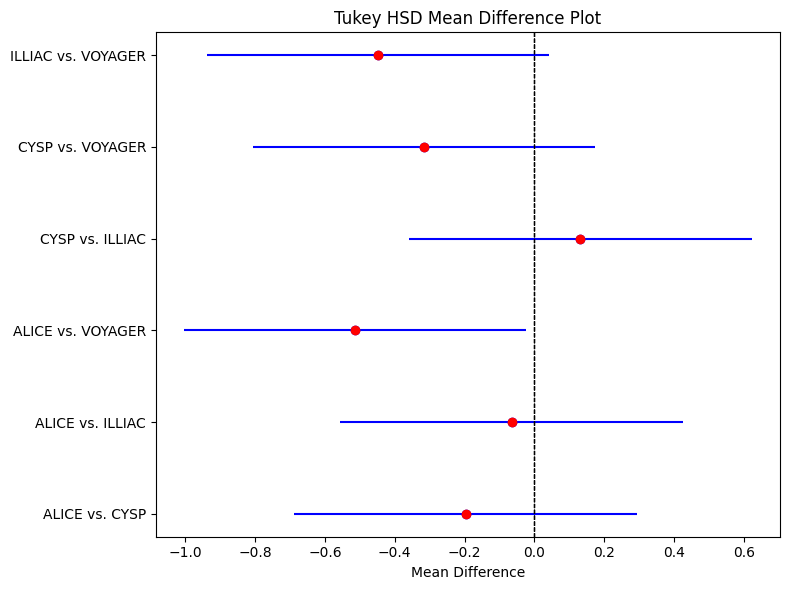

In [216]:
# Tukey HSD test
tukey_result = pairwise_tukeyhsd(
    data['FeltExcited'],
    data['SessionID'],
    alpha=0.05
)

print(tukey_result)

# Plot the mean difference plot
plot_tukey_results(tukey_result)

## I felt annoyed

In [224]:
# Perform the repeated-measures ANOVA
anova_summary, table = repeated_measures_anova(data, "FeltAnnoyed")

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
# Print the ANOVA summary
print(anova_summary)
print('---')
print(table)


                 Anova
          F Value Num DF  Den DF  Pr > F
----------------------------------------
SessionID  3.6683 3.0000 225.0000 0.0130

---
  Source of Variation  Sum of Squares (SS)  Degrees of Freedom (df)  Mean Squares (MS)  F-Statistic   P-Value
0      Between Groups            11.004843                      3.0           3.668281     3.668281  0.013049
1       Within Groups           225.000000                    225.0           1.000000          NaN       NaN


In [225]:
prettify_anova_table(anova_summary) 

# Test for equal variances for "FeltExcited"
stat, p_value = test_equal_variances(data, "FeltAnnoyed", session_id_column="SessionID")

stat, p_value

(0.4996252810392208, 0.6828171320802858)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
 ALICE    CYSP  -0.1053 0.9637  -0.673 0.4624  False
 ALICE  ILLIAC   0.2105 0.7733 -0.3572 0.7782  False
 ALICE VOYAGER   0.3421  0.405 -0.2256 0.9098  False
  CYSP  ILLIAC   0.3158 0.4772 -0.2519 0.8835  False
  CYSP VOYAGER   0.4474 0.1772 -0.1203 1.0151  False
ILLIAC VOYAGER   0.1316 0.9324 -0.4361 0.6993  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower  upper  reject
----------------------------------------------------
 ALICE    CYSP  -0.1053 0.9637  -0.673 0.4624  False
 ALICE  ILLIAC   0.2105 0.7733 -0.3572 0.7782  False
 ALICE VOYAGER   0.3421  0.405 -0.2256 0.9098  False
  CYSP  ILLIAC   0.3158 0.4772 -0.2519 0.8835  False
  CYSP VOYAGER   0.4474 0.1772 -0.1203 1.0151  False
ILLIAC VOYAGER   0.1316 0.9324 -0.4361 0.6993 

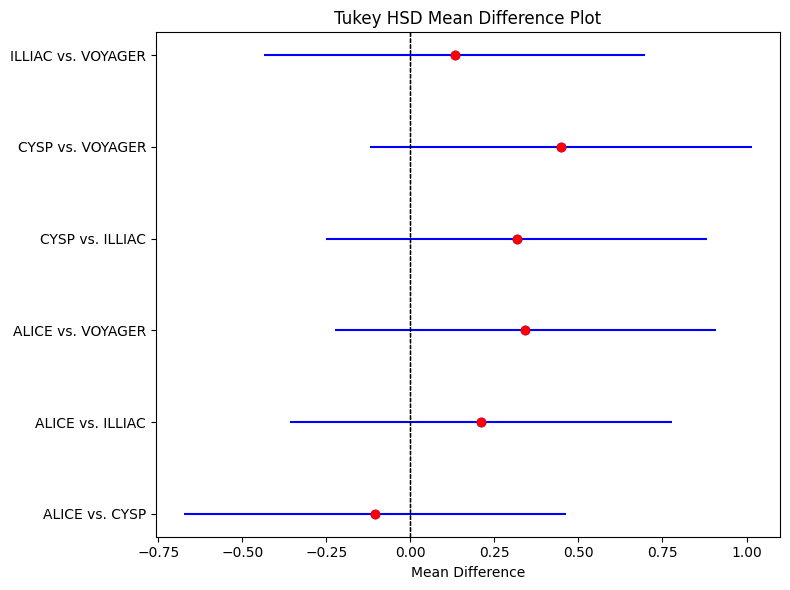

In [227]:

# Perform Tukey's HSD for "FeltExcited"
tukey_summary = perform_tukey_posthoc(data, "FeltAnnoyed", session_id_column="SessionID")

# Display the results
print(tukey_summary)


# Tukey HSD test
tukey_result = pairwise_tukeyhsd(
    data['FeltAnnoyed'],
    data['SessionID'],
    alpha=0.05
)

print(tukey_result)

# Plot the mean difference plot
plot_tukey_results(tukey_result)

pres 1: rhytm tech
arousal-valence model

setup and questions
    pre survey
        What descirbes you tbes
    during survey
        emotions

    post steudy
        i found it engating


What is valid data?

negative valence emotion. 

emotion vs Interest heatmap. 
negative and positive valence emotions 


keyboard interaction count vs participant type - > measure of engagement? cant see if this alligns with engagement part?


when anova shows significant differences we need to perforn posthoc test. 
tukeys ->


ANOVA indicated signif differences 
I felt excited 
I found it engaging 

Tukeys revealed i found it gengaing between goup 1 and goup 3 

these resuls support the alt hypothess, indicating signifi differnces in engagemen and emotional responses between professional musicians and non-musicians when interacting with the drum bot

feedback: 
- good choise with feedback. color? one color that gets stronger or weeaker? 
- better to use mean and std? anova is a measure of variance 
- ANOVA and Tukey is contradicting
    - 0.0011?
    - not strong enough
    - Bonferoni correction for normality? 
    - did you check for the alpha? when you do it manually, you choose the confidence the interval?
    - 

- nice to have info on data demographics
- 







    

Silent Disco:
DEpendent should be continious
Dependent - categorical

- higher F-value more certain that result doesnt come by chance 
- we have''''

we have radio data in the descrete . Discrete values are now continious with same distance between each consequtive par. we choose the significance level to be 0.05

Does music experience impact lvels of confusion?
check normality and find out that the two last ones were not normal

Does music experience impact coherence?


Does gender and sessionID impact the feeling at ease?
gender and type of music?

not normally disbtubted but we used the anov because we have enough for each good



feedback:
- how much data used/discarded
- show preprocessing 
- more info on demographic/characteristics of data
- 




AI-DRUMMER
what type of people we should buy targeted ads towards.
Key questions
feel excited, annoyed, would like to play again

categories 

use shapiro Wilks to check for normal distribution of data


-> ordinal data Likert scale 


***********for entire group what is the excitement and annoyance lvel bar chart with mean and median
avg of all sessions - took the avg of during

*they disregard age after 30 and only looke at musical background and gender

Excitement of gender
bar charg  
 
 musical exp also bar chart - > 

annoyance of guys is higher
some changes of annoying in music interes with std


Do statistic to check corlations

cant do statistics of "want to play more" :( all were listeners 


wanted to do anova.
used shapiro wilk test for normality -> most data failed this test *****NOT SURE about this one
data wasnt normally distributed we didnt use anova. -> we used friedmans chi test. 


reflection on data
-> mostly men 20


Feedback:
- two small groups and one big group can skew stuff
- reemphasize session, 
smoething about distribution 

Arousal -Valence Model of emptions

Post: frusteated

Emotion vs Session violin plots.
any stat difference between the sessions. 
look slike some more vaiability in excitement and voreness but need to use staats to analyse this

ANOVA
present ANOVA

when analzing 4 emotions togetehr do a bonferron correction could be apilied 
0.05/4 = new aplpaha 0.00125
Start with 1 way anova, emotions across sesisons during

no reason for posthoc here..

looked at post surveys "ifound it engaging" with high value of p

made a scatter plot with musically inclide vs non musically inclidend. 

Drum bot can be frustrating bot?
not necessarily reflect lvel of frustating

CDF for frusttration score


THen they did a two way anova to look at the musicality vs session compare?

samples are indepnte
population vairances are equal (passed levenes test)
groups have equal sample sizes

the pop failed Shapiro-wilk test :( damn
SO, they decided more than 30 participants in each group and thats enough to satisfy the normality assumption )that didnt hold

for 2 way anova with anova anliuss sepearet to reduce type 1 erorrs (to reduce false positives) removed bonferroni 

exited for the during set. no stat differences 
session and musciality no stat differences 

BUT the musicality group was significant different, when alpha = 0.5
with tukeys test 
confirmd that there was a group difference
non-music had higher exiteentment. 
only a 0.28 point difference, pratcial?
with scale with 0-4 how practical is it?
looked at sum of squares error, which shows how fitting the variance is being hit by the model of session and musicality and see that very little effect is explained by session or interaction at all? probably most variation canbe explained by different factor
consistend with all emoitions


lerger group with same demographic gives you nothing 

when you cannot prove that the null isnt false. you have proven that you cannot reject the null
"the H0 hypothesis could not be rejected"



Pre-processing

Study Music:
preliminary results
I felt curios and i felt excited vs what descitbes you best
plot the what descibes you ebest and use oclorf for the excitement and positive feedback
boxplot use negative and what descibes you best. 


look deeper

heatmap for "I felt Tired"
Interest on the left, response on the bottom, and the scale is the number of participants.  heatmap

I found it engaing inthe post study. 

NOW WE NEED TO CHECK if differnces we see between is statistically significant? 


ONE WAY anova results for all feelings
bored 
excited
tired 
curious
engaging

Feedback:
- 
